In [1]:
# Mapping data from GLEA, 1993-2013

In [2]:
#packages
import geopandas
import numpy as np
import pandas as pd
import datetime
from shapely.geometry import Point
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [16]:
#Get GEOJSON
country = geopandas.read_file("./Greenland_Shape.json")
#print(country.head())
#print(type(country.geometry[0]))
#country.plot(color='#DDDDDD', edgecolor='#000000', linewidth = 0.25)
# or country.boundary.plot(color='#666666')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


In [5]:
quakeData = pd.read_csv('./GLEA_1993_2023_HC.tsv', sep='\t')
quakeData.info()
quakeData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   hypocenter_type  1025 non-null   object 
 1   quality          1025 non-null   object 
 2   year             1025 non-null   int64  
 3   month            1025 non-null   int64  
 4   day              1025 non-null   int64  
 5   hour             1025 non-null   int64  
 6   minute           1025 non-null   int64  
 7   second           1025 non-null   float64
 8   latitude         1025 non-null   float64
 9   longitude        1025 non-null   float64
 10  depth            1025 non-null   float64
 11  magnitude_1      1025 non-null   float64
 12  magnitude_2      1025 non-null   float64
 13  region           1025 non-null   object 
 14  eventname        1025 non-null   object 
dtypes: float64(6), int64(5), object(4)
memory usage: 120.2+ KB


,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A


In [6]:
quakeData['coords'] = quakeData[['longitude', 'latitude']].values.tolist()  # Get coordinate values into a 2d list
quakeData['coords'] = quakeData['coords'].apply(Point)            # Convert coordinates into a point data type

# single date column accurate to day
quakeData['date'] = pd.to_datetime(quakeData[['year', 'month', 'day', 'hour', 'minute', 'second']])
quakeData.set_index('date')
quakeData

quakeDataGeo = geopandas.GeoDataFrame(quakeData, geometry='coords')  # Convert dataset to geodataframe.GeoDataFrame, append 'coords' as geometry

quakeDataGeo.head(10)

,hypocenter_type,quality,year,month,day,hour,minute,second,latitude,longitude,depth,magnitude_1,magnitude_2,region,eventname,coords,date
0,SWEM,A,1993,1,24,10,21,4.0,68.50,-33.50,10.0,0.0,5.1,EASTERNGREENLAND,199301241021A,POINT (-33.50000 68.50000),1993-01-24 10:21:04
1,SWEM,B,1993,7,26,12,26,40.0,65.75,-41.25,10.0,0.0,4.9,WESTERNGREENLAND,199307261226A,POINT (-41.25000 65.75000),1993-07-26 12:26:40
2,SWEM,A,1993,8,5,2,0,40.0,68.75,-32.75,10.0,0.0,4.9,EASTERNGREENLAND,199308050200A,POINT (-32.75000 68.75000),1993-08-05 02:00:40
3,SWEM,C,1993,10,19,21,10,0.0,66.50,-37.50,10.0,0.0,4.8,EASTERNGREENLAND,199310192110A,POINT (-37.50000 66.50000),1993-10-19 21:10:00
4,SWEM,C,1993,11,30,7,33,52.0,67.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199311300733A,POINT (-33.50000 67.50000),1993-11-30 07:33:52
5,SWEM,B,1993,12,10,15,24,56.0,67.25,-34.25,10.0,0.0,5.0,EASTERNGREENLAND,199312101524A,POINT (-34.25000 67.25000),1993-12-10 15:24:56
6,SWEM,B,1994,3,31,0,7,4.0,68.50,-33.50,10.0,0.0,4.8,EASTERNGREENLAND,199403310007A,POINT (-33.50000 68.50000),1994-03-31 00:07:04
7,SWEM,C,1994,4,6,18,1,28.0,65.75,-41.25,10.0,0.0,4.8,WESTERNGREENLAND,199404061801A,POINT (-41.25000 65.75000),1994-04-06 18:01:28
8,SWEM,C,1994,8,16,8,58,48.0,65.25,-40.75,10.0,0.0,4.7,WESTERNGREENLAND,199408160858A,POINT (-40.75000 65.25000),1994-08-16 08:58:48
9,SWEM,A,1994,8,21,8,36,48.0,68.50,-33.50,10.0,0.0,5.0,EASTERNGREENLAND,199408210836A,POINT (-33.50000 68.50000),1994-08-21 08:36:48


In [7]:
eventsRegion = quakeDataGeo.groupby(quakeDataGeo.region)
eventsRegion.size()

region
BAFFINBAY            40
EASTERNGREENLAND    391
WESTERNGREENLAND    594
dtype: int64

<Axes: title={'center': 'Total Glacial Quake Events By Year (All Of Greenland)'}, xlabel='Year', ylabel='Total Glacial Quakes'>

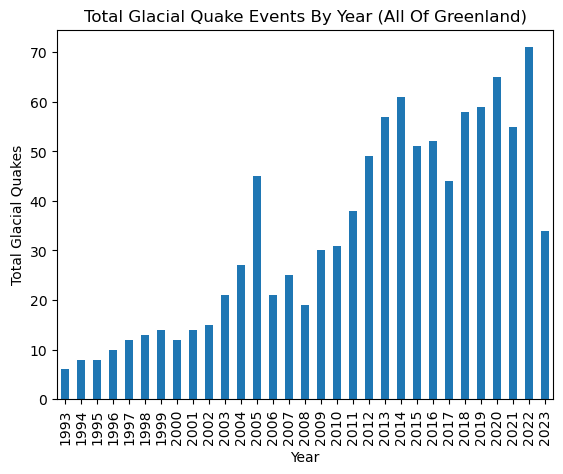

In [8]:
eventsAnnual = quakeDataGeo.groupby(quakeDataGeo.year).size()
eventsAnnual.plot(kind='bar', title="Total Glacial Quake Events By Year (All Of Greenland)", xlabel="Year", ylabel="Total Glacial Quakes")
#plt.savefig('figures/1024/GLEACatalogEvents_AnnualTotals.png', bbox_inches='tight')

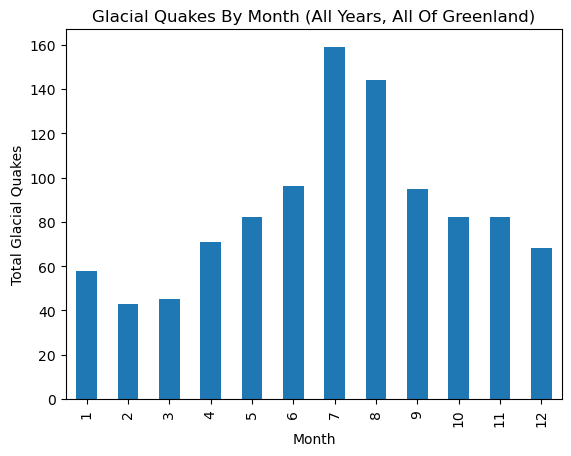

In [9]:
eventsMonthly = quakeDataGeo.groupby(quakeDataGeo.month).size()
eventsMonthly.plot(kind='bar', title="Glacial Quakes By Month (All Years, All Of Greenland)", xlabel="Month", ylabel="Total Glacial Quakes")
plt.savefig('figures/GLEACatalogEvents_MonthlyTotals.png', bbox_inches='tight')

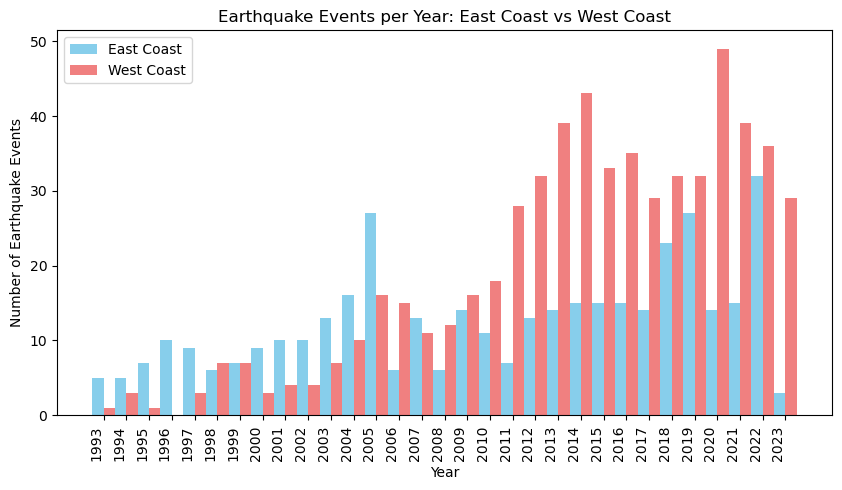

In [30]:
# plot by region and year, thanks GPT!!!!!!!!
grp_YearCoast = quakeDataGeo.groupby(['year', 'region']).size().unstack(fill_value=0)

bar_width = 0.5
years = grp_YearCoast.index
east_grp = grp_YearCoast['EASTERNGREENLAND']
west_grp = grp_YearCoast['WESTERNGREENLAND']
#north_grp = grp_YearCoast['BAFFINBAY']

# The x locations for the groups
x = np.arange(len(years))

# Create the plot
fig, ax = plt.subplots(figsize=(10,5))

# Plot the East Coast bars
ax.bar(x - bar_width/2, east_grp, bar_width, label='East Coast', color='skyblue')

# Plot the West Coast bars
ax.bar(x + bar_width/2, west_grp, bar_width, label='West Coast', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Earthquake Events per Year: East Coast vs West Coast')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=90, ha='right')
ax.legend()
plt.savefig('figures/GLEA-2023_AnnualbyCoast.png', bbox_inches='tight')

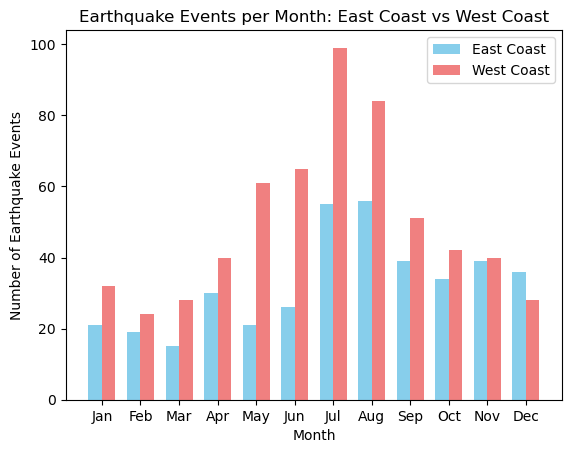

In [31]:
grp_YearCoast = quakeDataGeo.groupby(['month', 'region']).size().unstack(fill_value=0)

bar_width = 0.35
months = grp_YearCoast.index
east_grp = grp_YearCoast['EASTERNGREENLAND']
west_grp = grp_YearCoast['WESTERNGREENLAND']

# The x locations for the groups
x = np.arange(len(months))

# Create the plot
fig, ax = plt.subplots()

# Plot the East Coast bars
ax.bar(x - bar_width/2, east_grp, bar_width, label='East Coast', color='skyblue')

# Plot the West Coast bars
ax.bar(x + bar_width/2, west_grp, bar_width, label='West Coast', color='lightcoral')

# Add labels, title, and legend
ax.set_xlabel('Month')
ax.set_ylabel('Number of Earthquake Events')
ax.set_title('Earthquake Events per Month: East Coast vs West Coast')
ax.set_xticks(x)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.legend()
plt.savefig('figures/GLEA-2023_MonthlybyCoast.png', bbox_inches='tight')

In [11]:
# Ok try to find events at selected glaciers
# from GEarth

# Jakobshavn Isbræ: 69.175344, -49.723403
# Alison: 74.400444, -56.046531
# helheim: 66.3499996&lng=-38.199999999999996
# kanger: 68.63333265&lng=-32.99999999999999
# kong oscar: 76.02999974999999&lng=-59.66999980000001
# Sermeq Silardleq: 70.836178, -50.738631

# GLACIER DATA FRAME
glaciers = pd.DataFrame(
    {
 

#Do this so I can plot it too to verify
glaciers['coords'] = glaciers[['long', 'lat']].values.tolist()  # Get coordinate values into a 2d list
glaciers['coords'] = glaciers['coords'].apply(Point) 
glaciers = geopandas.GeoDataFrame(glaciers, geometry='coords')  # Convert dataset to geodataframe.GeoDataFrame, append 'coords' as geometry
glaciers


,glacier_name,lat,long,coords
0,Jakobshavn Isbræ,69.175344,-49.723403,POINT (-49.72340 69.17534)
1,Alison Glacier,74.400444,-56.046531,POINT (-56.04653 74.40044)
2,Helheim Glacier,66.349999,-38.199990,POINT (-38.19999 66.35000)
3,Kangerdlugssuaq Glacier,68.633333,-32.999990,POINT (-32.99999 68.63333)
4,Kong Oscar Glacier,76.029999,-59.669999,POINT (-59.67000 76.03000)
5,Sermeq Silardleq,70.836178,-50.738631,POINT (-50.73863 70.83618)


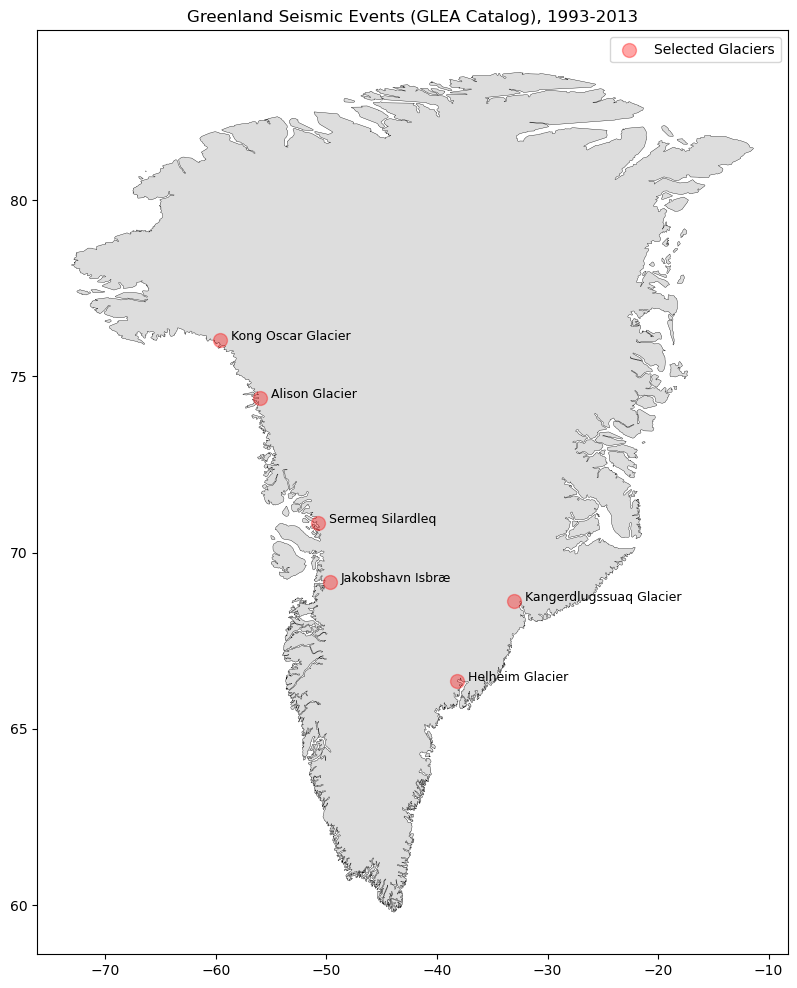

In [12]:
#PLOT ABOVE TO MAKE SURE YOUR LOCATIONS ARE CORRECT!

#fig, ax = plt.subplots(1, figsize=(10,5))

fig, ax = plt.subplots(figsize=(10, 12))

country.plot(
    ax=ax,
    color='#DDDDDD', 
    edgecolor='#000000', 
    linewidth = 0.25
)

#norm = plt.Normalize(vmin=quakeData['dateToOrdinal'].min(), vmax=quakeData['dateToOrdinal'].max())
#colors = matplotlib.colormaps.get_cmap('magma')(norm(quakeData['dateToOrdinal']))

scatter = ax.scatter(
    glaciers.geometry.x, 
    glaciers.geometry.y, 
    s=100,
    color='red',
    alpha=0.35, 
    label='Selected Glaciers'
)

long = glaciers['long']
lat = glaciers['lat']
for i, label in enumerate(glaciers['glacier_name']):
    plt.text(long[i] + 1.0, lat[i], label, fontsize=9)
    
ax.set_title("Greenland Seismic Events (GLEA Catalog), 1993-2013", fontsize=12)
plt.legend()

plt.savefig('figures/OlsenNettles_StudiesGlaciers.png', bbox_inches='tight')
plt.show()


In [13]:
# thanks GPT!!

# Haversine formula to calculate the distance between two points (lat1, lon1) and (lat2, lon2)
def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Function to find the nearest glacier within the given radius
def find_nearest_glacier(event_lat, event_lon, glaciers, radius_limit):
    distances = []
    for index, glacier in glaciers.iterrows():
        distance = haversine(event_lat, event_lon, glacier['lat'], glacier['long'])
        distances.append((glacier['glacier_name'], distance))
    
    # Find the glacier with the minimum distance
    nearest_glacier, min_distance = min(distances, key=lambda x: x[1])
    
    # Check if the distance is within the radius limit
    if min_distance <= radius_limit:
        return nearest_glacier
    else:
        return None  # No glacier within the radius

## BTW Totally unecessary because Nettles data already has a region code!!!!! %P 

In [14]:
# Apply the function to each earthquake event

radius_limit = 30  # km
quakeDataGeo['named_glacier'] = quakeDataGeo.apply(lambda row: find_nearest_glacier(row['lat'], row['long'], glaciers, radius_limit), axis=1)
quakeDataGeo

,lat,long,amp,azimuth,timeshift,year,month,day,hour,minute,...,o_lat,o_long,MSW,region,type,UID,coords,date,Coast,named_glacier
0,68.63,-32.94,1.97,-24,3.95,1993,1,24,10,21,...,68.50,-33.50,5.1,1,1,E199301241021,POINT (-32.94000 68.63000),1993-01-24 10:21:04,East,Kangerdlugssuaq Glacier
1,65.23,-40.87,0.63,-39,-10.52,1993,7,26,12,26,...,65.75,-41.25,4.9,3,1,E199307261226,POINT (-40.87000 65.23000),1993-07-26 12:26:40,East,None
2,68.58,-32.90,0.75,-49,9.84,1993,8,5,2,0,...,68.75,-32.75,4.9,1,1,E199308050200,POINT (-32.90000 68.58000),1993-08-05 02:00:40,East,Kangerdlugssuaq Glacier
3,68.66,-33.12,0.60,-50,-10.65,1993,8,24,2,56,...,67.00,-35.00,4.8,1,1,E199308240256,POINT (-33.12000 68.66000),1993-08-24 02:56:00,East,Kangerdlugssuaq Glacier
4,66.38,-37.72,0.35,100,14.83,1993,10,19,21,10,...,66.50,-37.50,4.8,2,1,E199310192110,POINT (-37.72000 66.38000),1993-10-19 21:10:00,East,Helheim Glacier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,69.20,-49.77,0.30,289,-0.41,2013,11,22,7,26,...,69.25,-49.75,4.9,7,2,S201311220726A,POINT (-49.77000 69.20000),2013-11-22 07:26:16,West,Jakobshavn Isbræ
440,74.99,-56.70,0.26,224,-5.95,2013,11,23,22,11,...,74.75,-57.25,4.7,4d,1,S201311232211A,POINT (-56.70000 74.99000),2013-11-23 22:11:20,West,None
441,69.12,-49.53,0.33,339,12.17,2013,12,5,9,54,...,68.75,-49.75,4.8,7,1,S201312050954A,POINT (-49.53000 69.12000),2013-12-05 09:54:16,West,Jakobshavn Isbræ
442,73.01,-54.48,0.46,77,29.12,2013,12,10,3,37,...,73.25,-54.75,5.0,5b,3,S201312100337A,POINT (-54.48000 73.01000),2013-12-10 03:37:44,West,None


In [15]:
glacier_event_counts = quakeDataGeo['named_glacier'].value_counts()
print(glacier_event_counts)

named_glacier
Helheim Glacier            101
Kangerdlugssuaq Glacier     80
Jakobshavn Isbræ            71
Kong Oscar Glacier          49
Alison Glacier              10
Sermeq Silardleq             2
Name: count, dtype: int64


year
1993     1
1996     5
1997     1
1998     3
1999     3
2000     1
2001     3
2002     6
2003     4
2004     8
2005    12
2006     1
2007     9
2008     3
2009    11
2010     5
2011     3
2012    10
2013    12
dtype: int64

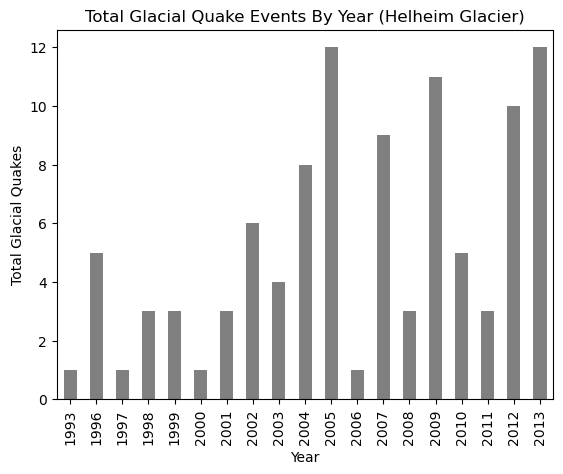

In [51]:
# plot named glaciers
# Just plot result of size
yearByGlacier = quakeDataGeo.groupby('named_glacier').get_group('Helheim Glacier').groupby('year').size()
display(yearByGlacier)

yearByGlacier.plot(kind='bar', title="Total Glacial Quake Events By Year (Helheim Glacier)", xlabel="Year", ylabel="Total Glacial Quakes", color="gray")
plt.savefig('figures/GLEACatalogEvents_Annual-Helheim.png', bbox_inches='tight')


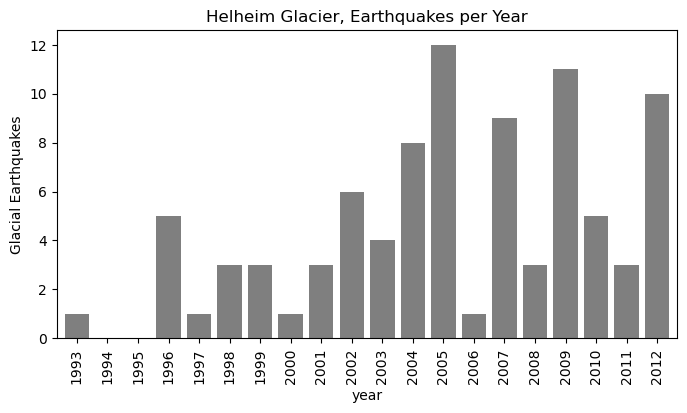

In [94]:
# New version, fix the gaps with no years:
yearPerGlacier = quakeDataGeo.groupby('named_glacier').get_group('Helheim Glacier').groupby('year')
ypg_counts = yearPerGlacier.size().to_frame()
#display(ypg_counts)

# Create a complete list of years (assuming the data ranges from 2000 to 2005)
all_years = pd.Series(np.arange(1993, 2013), name='year')

# Merge the full range of years with the event counts, filling missing years with 0
yearPerGlacier_full = all_years.to_frame().merge(ypg_counts, on='year', how='left').fillna(0)
yearPerGlacier_full = yearPerGlacier_full.set_index('year')
#display(yearPerGlacier_full)
yearPerGlacier_full.plot(kind='bar', figsize=(8, 4), color="tab:grey", width=0.8, legend=False, ylabel="Glacial Earthquakes", title="Helheim Glacier, Earthquakes per Year", )
plt.savefig('figures/GLEACatalogEvents_Annual-Helheim.png', bbox_inches='tight')

Jakobshavn Isbræ
Alison Glacier
Helheim Glacier
Kangerdlugssuaq Glacier
Kong Oscar Glacier
Sermeq Silardleq


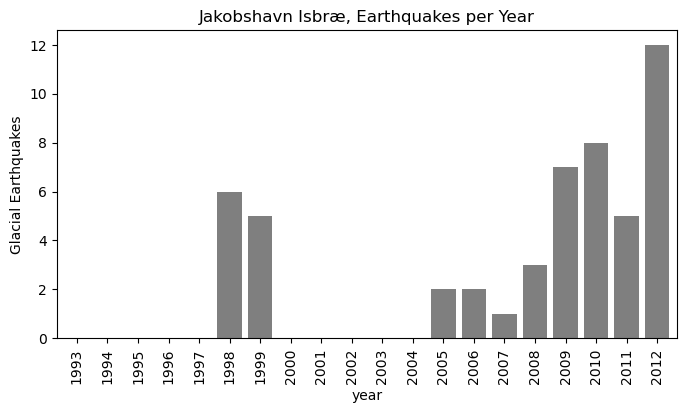

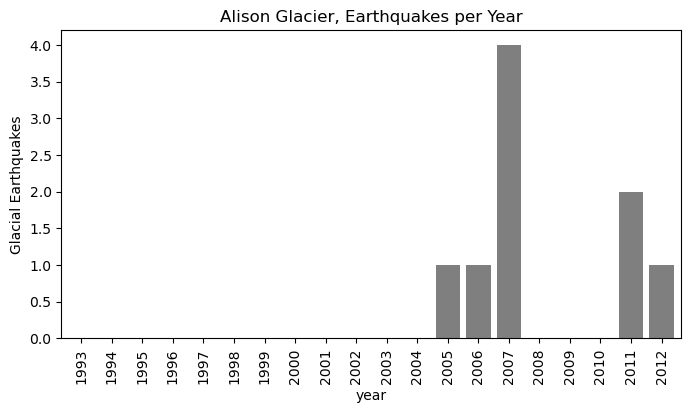

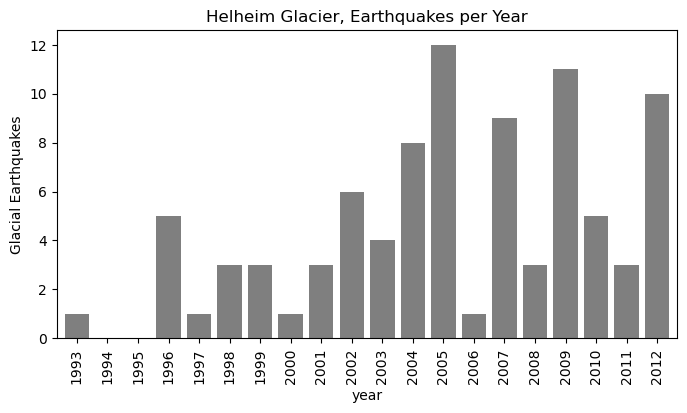

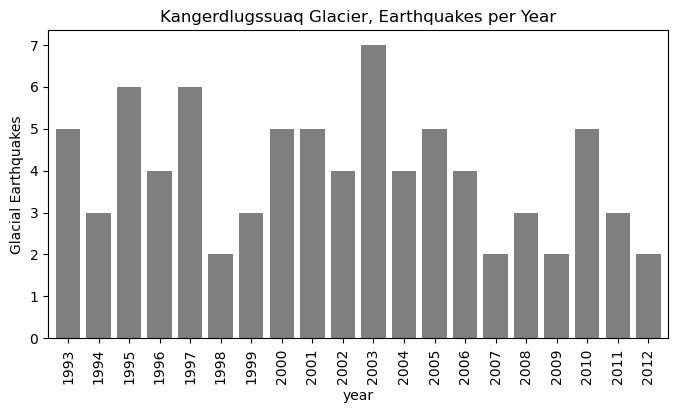

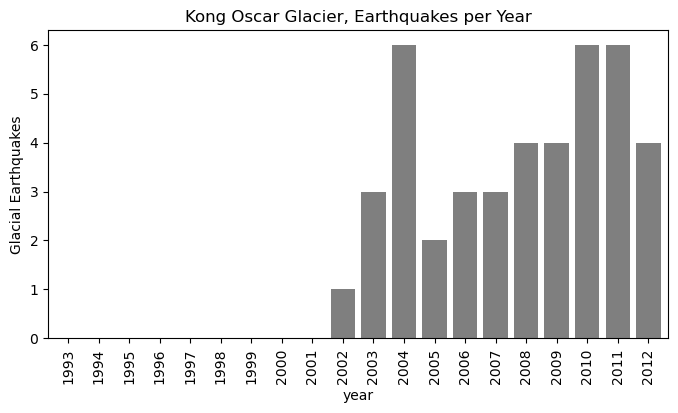

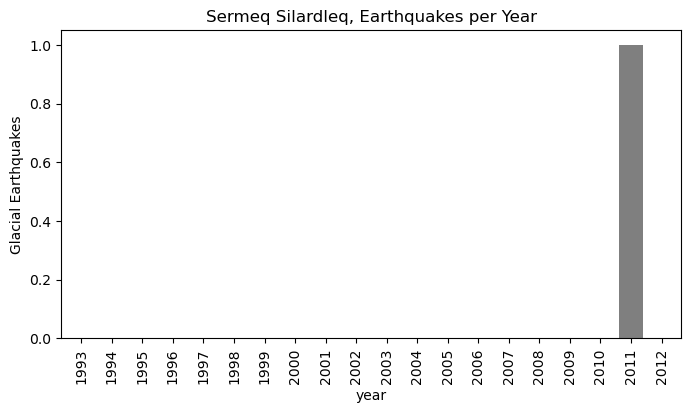

In [98]:
# Make plot for each named glacier
# NOW THERE'S a FOR LOOP FOR YOU!!

for glacier in glaciers['glacier_name']:
    print(glacier)
    yearPerGlacier = quakeDataGeo.groupby('named_glacier').get_group(glacier).groupby('year')
    ypg_counts = yearPerGlacier.size().to_frame()
    #display(ypg_counts)
    yearPerGlacier_full = all_years.to_frame().merge(ypg_counts, on='year', how='left').fillna(0)
    yearPerGlacier_full = yearPerGlacier_full.set_index('year')
    yearPerGlacier_full.plot(kind='bar', figsize=(8, 4), color="tab:grey", width=0.8, legend=False, ylabel="Glacial Earthquakes", title=glacier+", Earthquakes per Year", )
    plt.savefig('figures/GLEACatalogEvents_Annual-'+glacier+'.png', bbox_inches='tight')